# Heatmaps

In [ ]:
import os
os.environ['HTTP_PROXY']=""
os.environ['HTTPS_PROXY']=""

## Heatmaps con Folium

In [1]:
import pandas as pd

file=r"https://minsait-geospatial.s3.eu-west-3.amazonaws.com/data/Visualization/taxi_test.csv"
df_taxi = pd.read_csv(file)
df_taxi=df_taxi.sample(frac=0.01)
df_taxi.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
563234,id0237995,2,2016-01-19 23:51:18,1,-74.006088,40.719570,-73.978279,40.766560,N
62719,id2193474,2,2016-06-11 21:12:13,1,-73.976601,40.746681,-73.979530,40.731010,N
59193,id1049829,1,2016-06-13 00:09:27,1,-73.989998,40.729389,-73.956604,40.802639,N
481519,id0726324,1,2016-02-14 00:24:47,2,-73.984612,40.750038,-73.989128,40.718655,N
538974,id3649206,2,2016-01-28 20:15:36,1,-73.863869,40.769886,-73.988243,40.769073,N


In [2]:
df_taxi.pickup_datetime = pd.to_datetime(df_taxi.pickup_datetime, format='%Y-%m-%d %H:%M:%S')
df_taxi['month'] = df_taxi.pickup_datetime.apply(lambda x: x.month)
df_taxi['week'] = df_taxi.pickup_datetime.apply(lambda x: x.week)
df_taxi['day'] = df_taxi.pickup_datetime.apply(lambda x: x.day)
df_taxi['hour'] = df_taxi.pickup_datetime.apply(lambda x: x.hour)
df_hour_list = []
for hour in df_taxi.hour.sort_values().unique():
    df_hour_list.append(df_taxi.loc[df_taxi.hour == hour, ['pickup_latitude', 'pickup_longitude', 'count']].groupby(['pickup_latitude', 'pickup_longitude']).sum().reset_index().values.tolist())

C:\Users\vzaldo\AppData\Local\Continuum\anaconda3\envs\census\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [3]:
def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [4]:
import folium
from folium.plugins import HeatMap

base_map = generateBaseMap(default_zoom_start=11)
HeatMap(data=df_taxi[['pickup_latitude', 'pickup_longitude']].groupby(['pickup_latitude', 'pickup_longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)
base_map

In [5]:
from folium.plugins import HeatMapWithTime
base_map = generateBaseMap(default_zoom_start=11)
#base_map = folium.Map([47, 7.7], zoom_start=5, tiles='CartoDB positron')
HeatMapWithTime(df_hour_list, radius=10, auto_play=True, gradient={0.9: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map

## Heatmaps con Seaborn
También es posible utilizar el procedimiento de (Kernel density estimation) para visualizar una distribución bivariada. En seaborn, este tipo de diagrama se muestra con un diagrama de contorno y está disponible como un estilo en jointplot ():

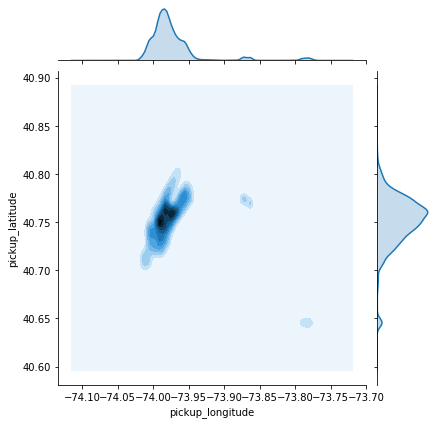

In [6]:
import seaborn as sns
sns.jointplot(x='pickup_longitude', y='pickup_latitude', data=df_taxi, kind="kde");

También podemos dibujar un diagrama de densidad de núcleo bidimensional con la función kdeplot (). Esto le permite dibujar este tipo de diagrama en un eje matplotlib específico.

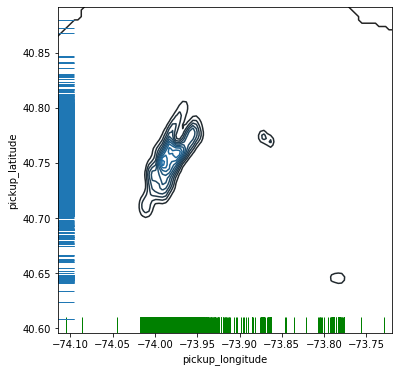

In [7]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df_taxi.pickup_longitude, df_taxi.pickup_latitude, ax=ax)
sns.rugplot(df_taxi.pickup_longitude, color="g", ax=ax)
sns.rugplot(df_taxi.pickup_latitude, vertical=True, ax=ax);

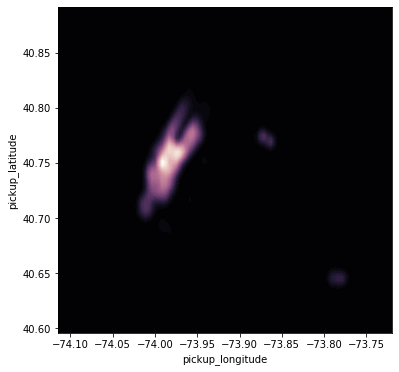

In [8]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df_taxi.pickup_longitude, df_taxi.pickup_latitude, cmap=cmap, n_levels=60, shade=True);